In [282]:

import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import proplot as pplt

In [283]:

rdir="results/medicare"

datasets = ["cutoff"]

results = []
curves = []
# for part in ("train", "test"):
for part in ("test", ):
    for dset in datasets:
        runs = [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]
        for seed in runs:
            try:
                exp_dir = f"../{rdir}/{dset}/{seed}"
                with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                    metrics = yaml.safe_load(io)

                with open(f"{exp_dir}/config.yaml", 'r') as io:
                    cfg = yaml.safe_load(io)
                metrics['seed'] = int(seed)
                metrics['dataset'] = dset
                metrics["part"] = part
                results.append(metrics)

                curve = pd.read_csv(f"{exp_dir}/curve.csv")
                curve['seed'] = int(seed)
                curve["part"] = part
                curve["delta_unscaled"] = np.clip(curve["delta_unscaled"] , 0, 29)
                curves.append(curve)
            except:
                pass

results = pd.DataFrame(results)
all_curves = curves
curves = pd.concat(all_curves)
traces = np.stack([D.test_tr_estim.values for D in all_curves], 1)[::-1]
# C = curves.set_index(['seed'])
# traces = np.stack([C.loc[ss for s in curves.seed.unique()], -1)
curve = curves.groupby("delta_unscaled").agg(mu=pd.NamedAgg('train_aipw_estim', 'mean'), ci=pd.NamedAgg('train_aipw_estim', lambda x: 1.96 * x.std() / np.sqrt(len(x)) ), n=pd.NamedAgg('train_aipw_estim', len))
# results.groupby(['part', 'dataset']).agg(lambda x: f"{x.mean():.3f}+={1.96 * x.std() / np.sqrt(len(x)) :.3f}")
curve


,mu,ci,n
delta_unscaled,,,
6.0,-77.726924,103.765189,80
7.0,-75.809416,103.438685,80
8.0,-74.973247,103.818377,80
9.0,-73.155963,103.406146,80
10.0,-71.298860,101.240652,80
11.0,-70.818219,101.153281,80
12.0,-80.429521,109.185534,80
15.0,-78.896191,109.065658,80
29.0,-64.486329,95.650845,80


Plot curves

In [284]:
trac = (traces / traces[-1, :] - 1)* 100

In [285]:
np.quantile(trac, 0.25, axis=1)

array([-9.24720517, -7.71083802, -6.13434816, -4.44097003, -3.21139006,
       -1.98683826, -1.24337767, -0.28899941,  0.        ])

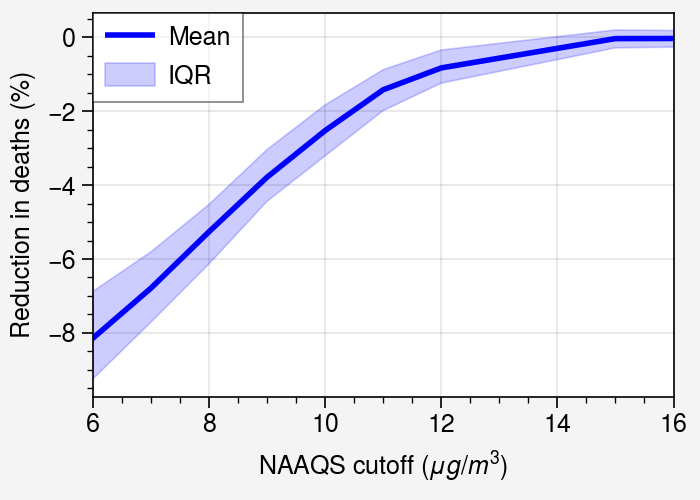

In [286]:
fig, ax = pplt.subplots([1], figsize=(3.5, 2.5))

# pct = 100 * (curve.mu / curve.mu.iloc[0] - 1).values
# ci = 100 * (curve.ci / curve.mu.iloc[0]).values
x = curve.index
mu = trac.mean(1)
# ci = 1.96 * trac.std(1) / np.sqrt(len(traces))
# ci = 1.96 * trac.std(1) / np.sqrt(len(traces))
upper = np.quantile(trac, 0.75, axis=1)
ax[0].plot(x, mu, c="blue", lw=2, label="Mean")
lower = np.quantile(trac, 0.25, axis=1)
ax[0].fill_between(x, lower, upper, c="blue", alpha=0.2, label="IQR")
    

ax[0].set_xlim(6, 16)
ax[0].set_xlabel("NAAQS cutoff ($\mu g/m^3$)")
ax[0].set_ylabel("Reduction in deaths (%)");
ax[0].legend(ncol=1, framealpha=0.5)
plt.savefig("results_cutoff.pdf", bbox_inches="tight")
    # ax[1].set_xlim(8, 14)
    # for k in range(2):
    #     ax[k].set_xlabel("NAAQS")

In [287]:

rdir="results/medicare"

datasets = ["percent"]

results = []
curves = []
# for part in ("train", "test"):
for part in ("test", ):
    for dset in datasets:
        runs = [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]
        for seed in runs:
            try:
                exp_dir = f"../{rdir}/{dset}/{seed}"
                with open(f"{exp_dir}/metrics_{part}.yaml", 'r') as io:
                    metrics = yaml.safe_load(io)

                with open(f"{exp_dir}/config.yaml", 'r') as io:
                    cfg = yaml.safe_load(io)
                metrics['seed'] = int(seed)
                metrics['dataset'] = dset
                metrics["part"] = part
                results.append(metrics)

                curve = pd.read_csv(f"{exp_dir}/curve.csv")
                curve['seed'] = int(seed)
                curve["part"] = part
                curves.append(curve)
            except:
                pass

results = pd.DataFrame(results)
all_curves = curves
curves = pd.concat(all_curves)
traces = np.stack([D.test_tr_estim.values for D in all_curves], 1)
# C = curves.set_index(['seed'])
# traces = np.stack([C.loc[ss for s in curves.seed.unique()], -1)
curve = curves.groupby("delta").agg(mu=pd.NamedAgg('train_aipw_estim', 'mean'), ci=pd.NamedAgg('train_aipw_estim', lambda x: 1.96 * x.std() / np.sqrt(len(x)) ), n=pd.NamedAgg('train_aipw_estim', len))
# results.groupby(['part', 'dataset']).agg(lambda x: f"{x.mean():.3f}+={1.96 * x.std() / np.sqrt(len(x)) :.3f}")
print(curve.shape)
# curves

(20, 3)


In [288]:
traces.shape

(20, 50)

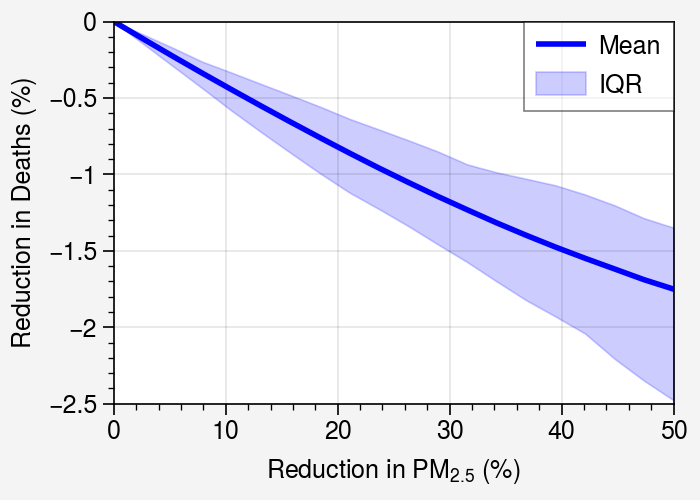

In [289]:
fig, ax = pplt.subplots([1], figsize=(3.5, 2.5))

# pct = 100 * (curve.mu / curve.mu.iloc[0] - 1).values
# ci = 100 * (curve.ci / curve.mu.iloc[0]).values
x = curve.index * 100
trac = (traces / traces[0, :] * 100) - 100
mu = trac.mean(1)
# ci = 1.96 * trac.std(1) / np.sqrt(len(traces))
# ci = 1.96 * trac.std(1) / np.sqrt(len(traces))
upper = np.quantile(trac, 0.75, axis=1)
lower = np.quantile(trac, 0.25, axis=1)
ax[0].fill_between(x, lower, upper, c="blue", alpha=0.2, label="IQR")
# ax[0].plot(x, trac, c="grey5", lw=1, alpha=0.5)
ax[0].plot(x, mu, c="blue", lw=2, label="Mean")
ax[0].legend(ncols=1, framealpha=0.5)
ax[0].set_ylim(-2.5, 0)
ax[0].set_xlabel("Reduction in PM$_{2.5}$ (%)")
ax[0].set_ylabel("Reduction in Deaths (%)");
plt.savefig("results_percent.pdf", bbox_inches="tight")